In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kumarshivam8709
Your Kaggle Key: ··········


100%|██████████| 1.06G/1.06G [00:05<00:00, 197MB/s]


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,BatchNormalization,Dropout,Flatten,Dense

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
def normalize(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label
train_ds=train_ds.map(normalize)
validation_ds=validation_ds.map(normalize)

In [52]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [54]:
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 107ms/step - loss: 1.6273 - accuracy: 0.5796 - val_loss: 0.6066 - val_accuracy: 0.6718
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6016 - accuracy: 0.6748 - val_loss: 0.5829 - val_accuracy: 0.7092
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5055 - accuracy: 0.7512 - val_loss: 0.4856 - val_accuracy: 0.7780
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4617 - accuracy: 0.7806 - val_loss: 0.5433 - val_accuracy: 0.7318
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4164 - accuracy: 0.8070 - val_loss: 0.4829 - val_accuracy: 0.7576
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3728 - accuracy: 0.8301 - val_loss: 0.4415 - val_accuracy: 0.7988
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3279 - accuracy: 0.8568 - val_loss: 0.5771 - val_ac

In [56]:
import cv2

In [57]:
import matplotlib.pyplot as plt

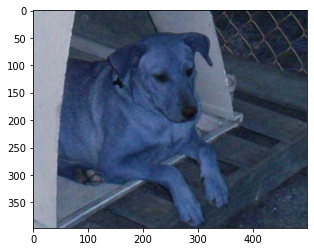

In [63]:
test_img=cv2.imread('/content/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.100.jpg')
plt.imshow(test_img)

In [64]:
test_img.shape

(397, 500, 3)

In [65]:
test_img=cv2.resize(test_img,(256,256))

In [66]:
test_input = test_img.reshape((1,256,256,3))

In [67]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[1.]], dtype=float32)

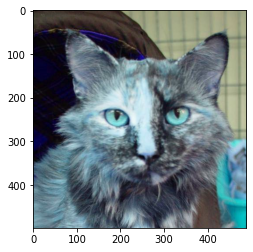

In [69]:
test_img_2=cv2.imread('/content/dogs-vs-cats/dogs_vs_cats/test/cats/cat.10.jpg')
plt.imshow(test_img_2)

In [70]:
test_img_2.shape

(499, 489, 3)

In [74]:
test_img_2=cv2.resize(test_img_2,(256,256))

In [75]:
input_2=test_img_2.reshape(1,256,256,3)

In [76]:
model.predict(input_2)

1/1 [==============================] - 0s 69ms/step


array([[0.]], dtype=float32)